# Behaviour analysis of bonsai VR

In [2]:
from aeon.io.reader import Csv, Reader
import aeon.io.api as aeon
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import importlib as imp
import parse_bonsai_functions
imp.reload(parse_bonsai_functions)

<module 'parse_bonsai_functions' from '/Users/athinaapostolelli/Documents/SWC/VR_ABCD_project/Bonsai_ABCD/parse_bonsai_functions.py'>

## Parse mouse and date info into root session folder

In [3]:
mouse_id = "006"
date = "20251024"
root = "/Volumes/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/rawdata/"
session_path = parse_bonsai_functions.find_base_path(mouse_id, date, root)

Found folder: /Volumes/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/rawdata/sub-006/ses-full011_date-20251024T154354


## Load all the relevant files
- settings (session and rig)
- events (odour phases)
- licks
- rewards
- position
- speed
- (analog data for precise timing)
- (optional cameras)

In [4]:
ses_settings, ses_rig_settings = parse_bonsai_functions.load_settings(session_path)

Save all event logs into pandas dataframe

In [5]:
sess_dataframe = parse_bonsai_functions.load_data(session_path)

Sanity check:

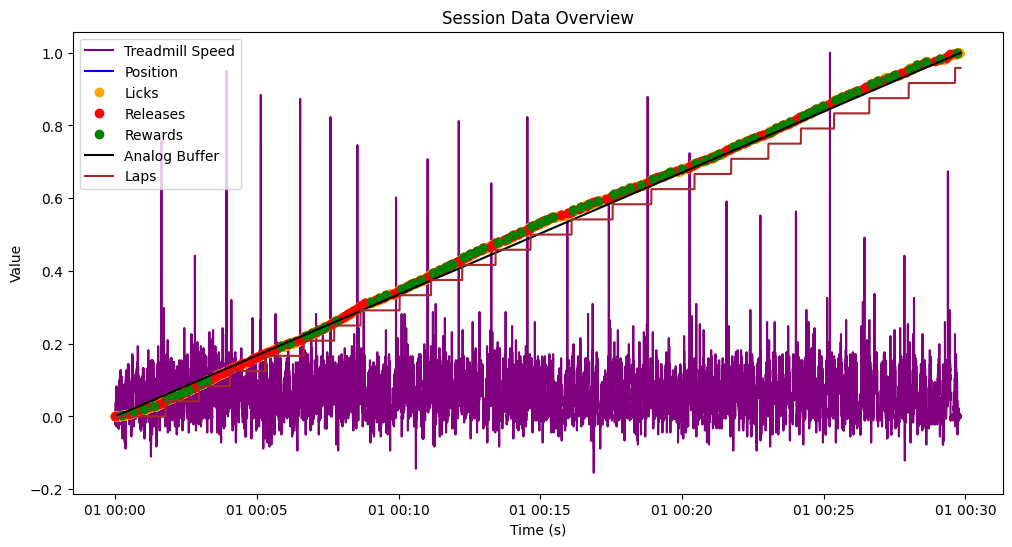

In [6]:
parse_bonsai_functions.plot_ethogram(sess_dataframe,ses_settings)

In [7]:
parse_bonsai_functions.print_sess_summary(sess_dataframe,ses_settings)

Session Summary:
Total Licks: 6237
Total Landmarks: 232
Total Rewards: 81
Hit Rate: 94.62%, False Alarm Rate: 71.94%, D-prime: 0.84
Targets Licked: 88 of 93, Distractors Licked: 100 of 139
rewarded odours: ['odour13' 'odour17' 'odour18' 'odour6'], rewarded textures: ['grating1' 'grating2' 'leaves' 'light_squares']
non-rewarded odours: ['odour1' 'odour11' 'odour12' 'odour14' 'odour19' 'odour4'], non-rewarded textures: ['dark_squares' 'dots' 'grass' 'logs' 'tiles' 'waves']


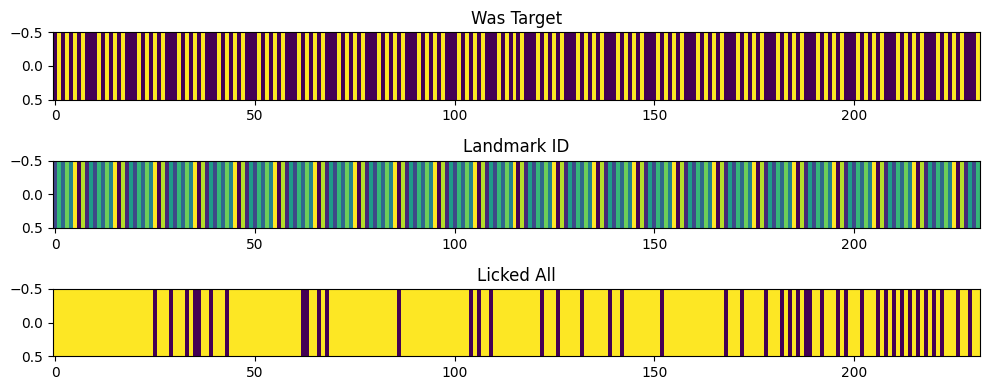

In [8]:
parse_bonsai_functions.plot_lick_lm(sess_dataframe,ses_settings)

## 2LM and 3LM training stages

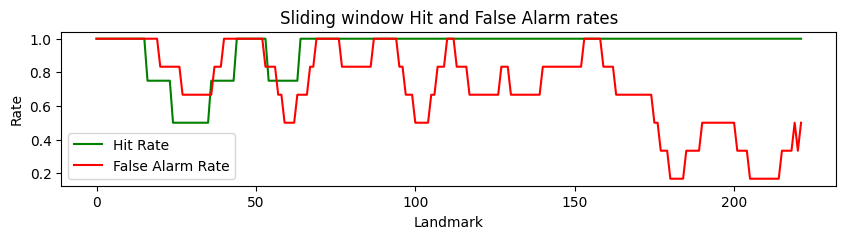

In [9]:
parse_bonsai_functions.plot_sw_hit_fa(sess_dataframe,ses_settings,window=10)

## Random world plots
For ABC sequencing for now

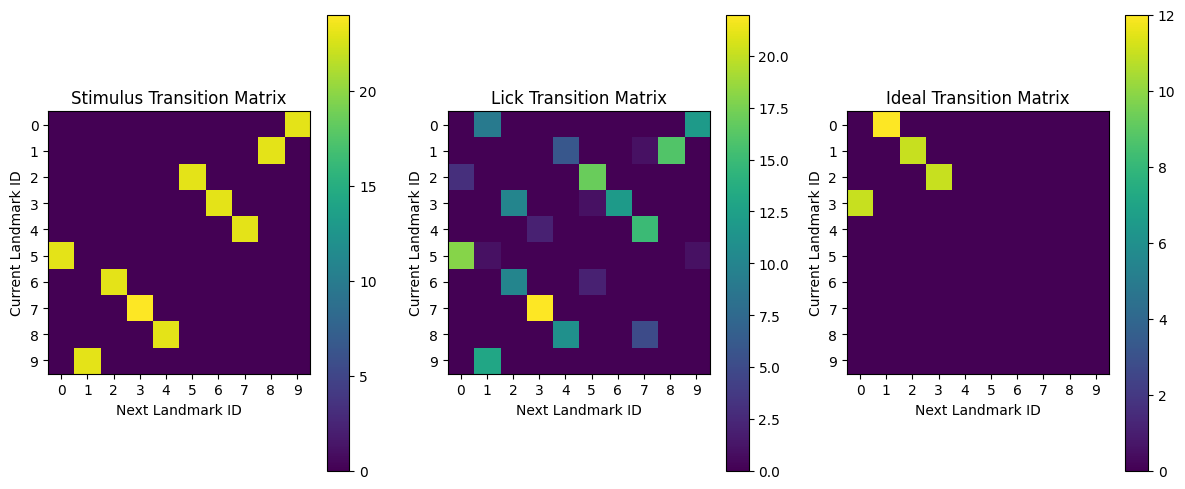

In [10]:
parse_bonsai_functions.plot_transition_matrix(sess_dataframe,ses_settings)

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (5).

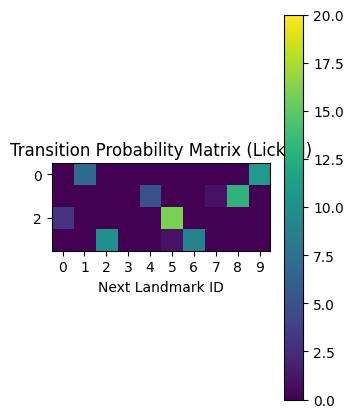

In [11]:
parse_bonsai_functions.plot_conditional_matrix(sess_dataframe,ses_settings)

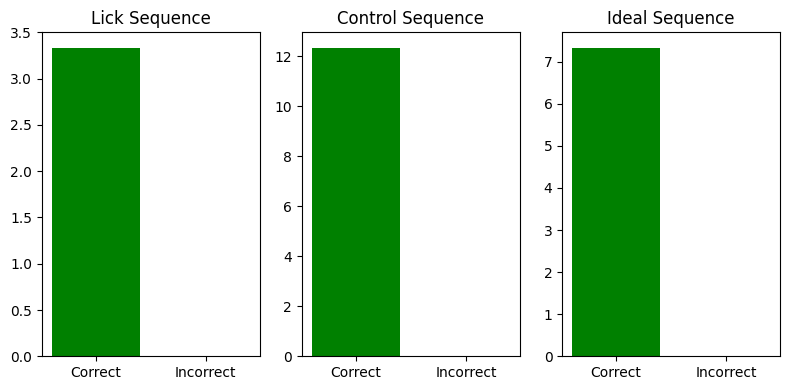

In [12]:
parse_bonsai_functions.plot_sequencing_ABC(sess_dataframe,ses_settings)

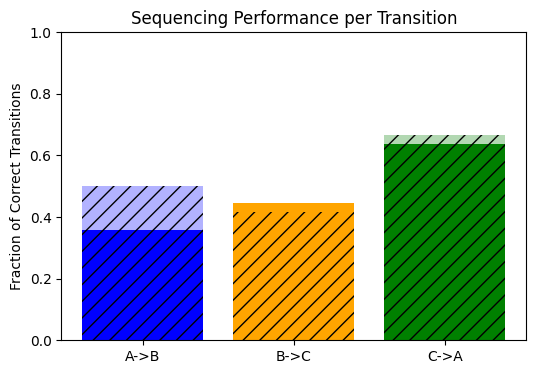

Sequencing Performance: 47.93%
Control Performance: 52.78%


0.47931697931697936

In [456]:
parse_bonsai_functions.plot_seq_fraction(sess_dataframe,ses_settings,test='control') 
# test can be 'transition' (actual performance) or 'control' (licked at all targets) or 'ideal' (licked perfectly in sequence)

## Stable world plots

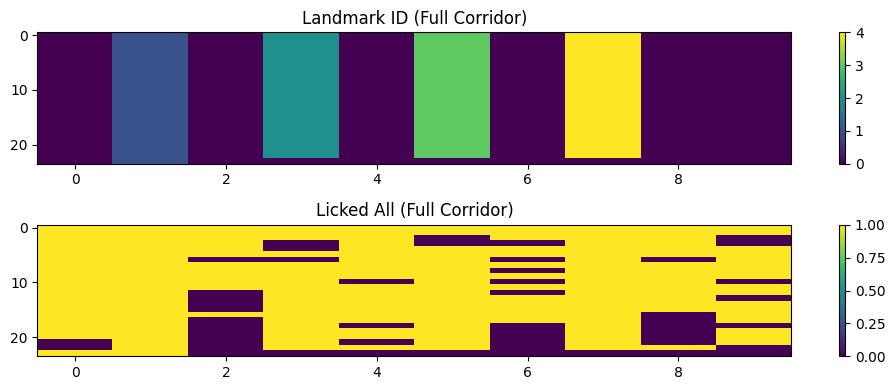

In [13]:
parse_bonsai_functions.plot_full_corr(sess_dataframe,ses_settings)

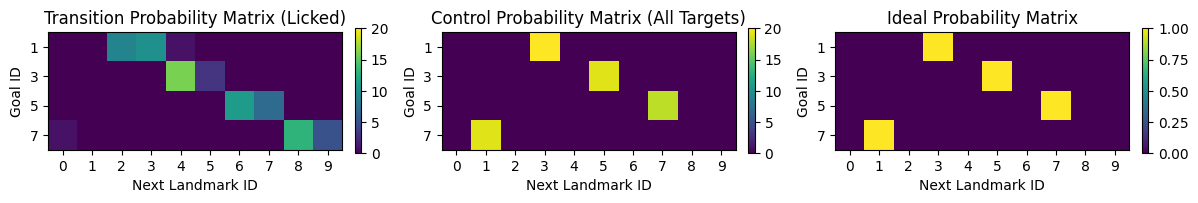

In [14]:
parse_bonsai_functions.plot_stable_conditional_matrix(sess_dataframe,ses_settings)

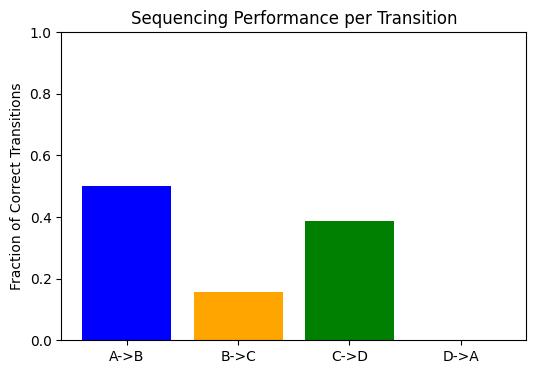

Sequencing Performance: 26.17%


(0.26169590643274854, 0.5, 0.15789473684210525, 0.3888888888888889, 0.0)

In [15]:
parse_bonsai_functions.calc_stable_seq_fraction(sess_dataframe,ses_settings,test='transition')

In [ ]:
position binned speed per lap, separated by lap identity